In [1]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [2]:
df=pd.read_csv("final.csv")
y = df['Class'].values
x = df.drop(labels= 'Class', axis= 1).values

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.6)

In [4]:
import tensorflow as tf
model = Sequential(
    [
        tf.keras.Input(shape=(24,),),
        Dense(30, activation= "relu"),
        Dense(15, activation= "relu"),
        Dense(7, activation= "relu"),
        Dense(3, activation= "relu"),
        Dense(1, activation= "sigmoid")
    ]
)

model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.006),
    metrics = ['accuracy']
)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                750       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 7)                 112       
                                                                 
 dense_3 (Dense)             (None, 3)                 24        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 1,355
Trainable params: 1,355
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Train the model
history = model.fit(x_train, y_train, epochs= 350)

Epoch 1/1000
5/5 [==============================] - 1s 4ms/step - loss: 0.6924 - accuracy: 0.5437
Epoch 2/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.6062
Epoch 3/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.6062
Epoch 4/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.6062
Epoch 5/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.6062
Epoch 6/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.6062
Epoch 7/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.6062
Epoch 8/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.6062
Epoch 9/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.6062
Epoch 10/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6062
Epoch 11/1000
5/5 [

In [7]:

#Save the model
model.save('ckddnn.model')


INFO:tensorflow:Assets written to: ckddnn.model\assets


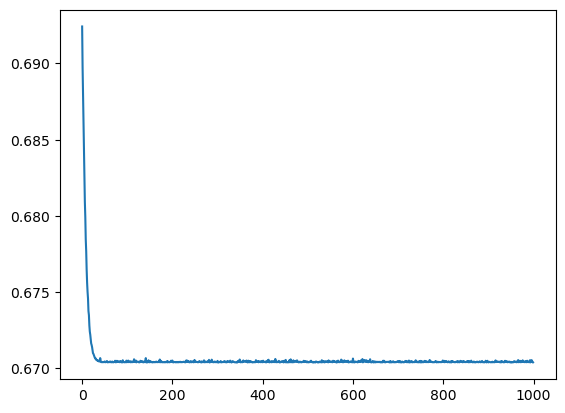

In [8]:
#Visualize the loss and accuracy of the model
plt.plot(history.history['loss'])

In [9]:

pred=model.predict(x_test)
#Show the actual values
print(y_test)
print(pred)

8/8 [==============================] - 0s 2ms/step
[1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0
 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1
 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1]
[[0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]
 [0.60677713]

In [10]:
print('Original {0}:'.format(", ".join(str(x) for x in y_test)))
print('Predict  {0}:'.format(", ".join(str(x) for x in pred)))


Original 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1:
Predict  [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.60677713], [0.6067771

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
newpred=pred.round()
newpred=abs(newpred)
precision=precision_score(y_test,newpred)
recall=recall_score(y_test,newpred)
f1=f1_score(y_test,newpred)
accuracy=accuracy_score(y_test,newpred)
auc=roc_auc_score(y_test,pred)
gini=2*auc-1
print("gini",gini*100)
print("Precision",precision*100)
print("Recall",recall*100)
print("f1 score",f1*100)
print("roc auc score",auc*100)
print("accuracy",accuracy*100)

gini 0.0
Precision 63.74999999999999
Recall 100.0
f1 score 77.86259541984732
roc auc score 50.0
accuracy 63.74999999999999
